<a href="https://colab.research.google.com/github/JheanmarcoOscanoa/Laboratorio-08/blob/main/Laboratorio_N%C2%B008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 08: ÁRBOLES DE DECISIÓN BOSQUES ALEATORIOS

**Autor:** Jheanmarco Oscanoa Vargas  
**Curso:** Minería de Datos  
**Institución:** TECSUP  
**Semana:** 8  

---

In [54]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Parte a.

Lea la base de datos, realice imputaciones, tratamiento de outliers, transformaciones de datos y desbalance de clases en caso sea necesario. Además, separe la variable de clasificación del resto de variables para luego obtener los datos de entrenamiento y prueba, tomando de este último el 25% de datos.

###  a.1 Cargar y preprocesar los datos (limpieza)

In [55]:
def load_data(url):
    """
    Carga los datos desde el enlace proporcionado y asigna nombres de columnas.
    """
    column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
                    'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
                    'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

    df = pd.read_csv(url, names=column_names)
    return df


def clean_and_preprocess_data(df):
    """
    Realiza limpieza de datos, imputación de valores faltantes y codificación del target.
    """
    df_cleaned = df.copy()
    df_cleaned.replace('?', np.nan, inplace=True)
    df_cleaned['Bare Nuclei'] = pd.to_numeric(df_cleaned['Bare Nuclei'])
    df_cleaned['Bare Nuclei'].fillna(df_cleaned['Bare Nuclei'].median(), inplace=True)
    df_cleaned.drop(columns=['Sample code number'], inplace=True)
    df_cleaned['Class'] = df_cleaned['Class'].apply(lambda x: 1 if x == 4 else 0)  # 4 es maligno, 2 es benigno
    return df_cleaned


In [56]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
df_raw = load_data(url)
df = clean_and_preprocess_data(df_raw)
df.head()

<ipython-input-55-b14f3cbda150>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Bare Nuclei'].fillna(df_cleaned['Bare Nuclei'].median(), inplace=True)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


### a.2 Desbalance de clases

In [57]:
# Desbalance de clases
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    458
1    241
Name: count, dtype: int64


### a.3 separe la variable de clasificación del resto de variables

In [58]:
# Separe la variable de clasificación del resto de variables para luego obtener los datos de entrenamiento y prueba, tomando de este último el 25% de datos.
from sklearn.model_selection import train_test_split

x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## Parte b -
Genere el modelo de árbol de decisión para clasificación y la profundidad adecuada para este. Además, calcule las métricas de clasificación e interprete sus resultados más importantes.


### b.1 Generamos el modelo de árbol de decision para clasificación y la profundidad adecuada.

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Ini

def entrenar_modelo_arbol(X_train, y_train):
    """
    Entrena un modelo de árbol de decisión con la profundidad adecuada.
    """
    modelo_arbol = DecisionTreeClassifier(random_state=42)
    modelo_arbol.fit(X_train, y_train)
    return modelo_arbol

In [60]:
# Llama a la función para entrenar el modelo
modelo_decision_tree = entrenar_modelo_arbol(X_train, y_train)
modelo_decision_tree

DecisionTreeClassifier(random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

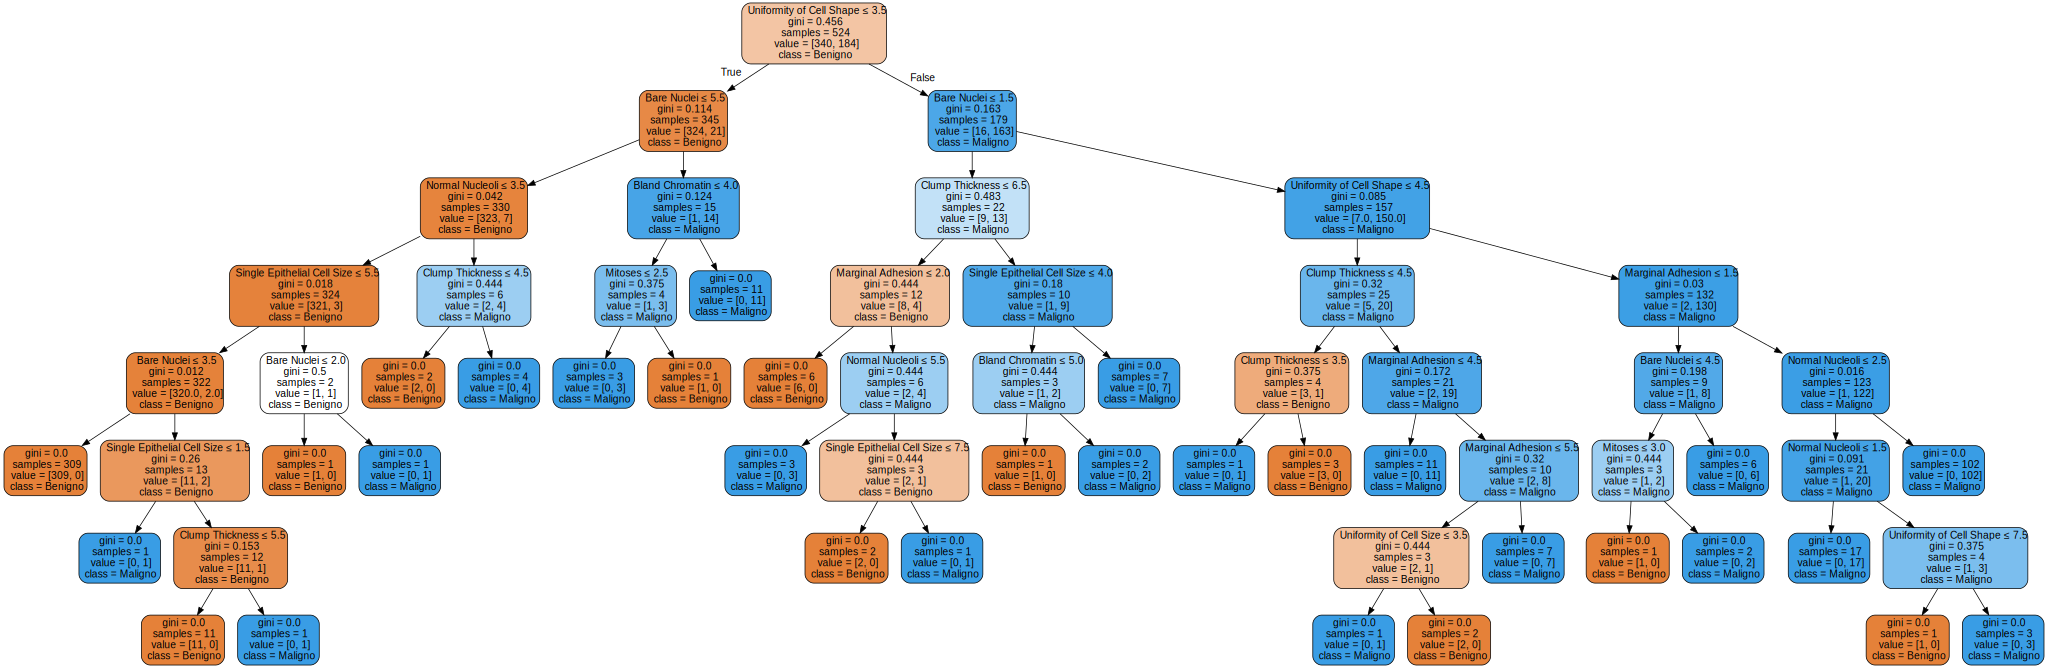

In [62]:
# Nombres de las características y las clases ---
feature_names = X_train.columns.tolist()
class_names = ['Benigno', 'Maligno']

modelo_arbol = modelo_decision_tree

# Exportar el árbol a formato DOT ---
dot_data = export_graphviz(modelo_arbol,
                           out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Crear el gráfico a partir de los datos DOT ---
graph = graphviz.Source(dot_data)

graph.render("decision_tree")
graph

## b.2 Métricas de clasificación e interprete sus resultados más importantes.

Profundidad del árbol de decisión entrenado: 7
Precisión en Entrenamiento: 100.0%
Precisión en Prueba: 94.86%

Reporte de Clasificación (Prueba):
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       118
           1       0.93      0.91      0.92        57

    accuracy                           0.95       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.95      0.95      0.95       175



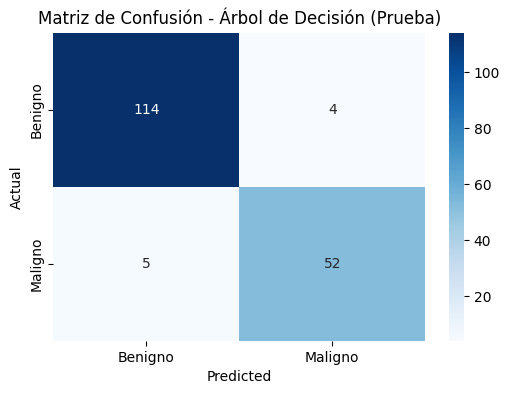

In [63]:
# --- Celda para calcular las métricas de clasificación y profundidad ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    # Obtener la profundidad del árbol entrenado
    profundidad_arbol = modelo.tree_.max_depth
    print(f"Profundidad del árbol de decisión entrenado: {profundidad_arbol}")

    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f"Precisión en Entrenamiento: {round(acc_train * 100, 2)}%")
    print(f"Precisión en Prueba: {round(acc_test * 100, 2)}%")
    print("\nReporte de Clasificación (Prueba):\n", classification_report(y_test, y_pred_test))
    # Guarda el reporte de clasificación en una variable llamada 'report_tree' (o el nombre que prefieras)
    report_tree = classification_report(y_test_resultado, y_pred_resultado, output_dict=True)


    # Matriz de confusión para el conjunto de prueba
    cm_test = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de Confusión - Árbol de Decisión (Prueba)')
    plt.show()

    return y_test, y_pred_test

# Llama a la función de evaluación
y_test_resultado, y_pred_resultado = evaluar_modelo(modelo_decision_tree, X_train, y_train, X_test, y_test)

In [64]:
report_tree = classification_report(y_test_resultado, y_pred_resultado, output_dict=True)

## Parte C:
Genere el modelo de bosques aleatorios para clasificación. Además, calcule las métricas de clasificación y compárelas con las del árbol de clasificación. ¿Hubo mejoras o no?

### c.1. Generamos el modelo de bosques aleatorios para clasificación

In [65]:
# Generamos el modelo de bosques aleatorios para clasificación
from sklearn.ensemble import RandomForestClassifier

def entrenar_modelo_bosques_aleatorios(X_train, y_train):
    """
    Entrena un modelo de Random Forest para clasificación.
    """
    modelo_bosques_aleatorios = RandomForestClassifier(random_state=42)
    modelo_bosques_aleatorios.fit(X_train, y_train)
    return modelo_bosques_aleatorios

In [66]:
modelo_bosques_aleatorios = entrenar_modelo_bosques_aleatorios(X_train, y_train)
modelo_bosques_aleatorios

RandomForestClassifier(random_state=42)

### c.2 Calcule las métricas de clasificación

Precisión en Entrenamiento: 100.0%
Precisión en Prueba: 96.57%

Reporte de Clasificación (Prueba):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.95      0.95      0.95        57

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175



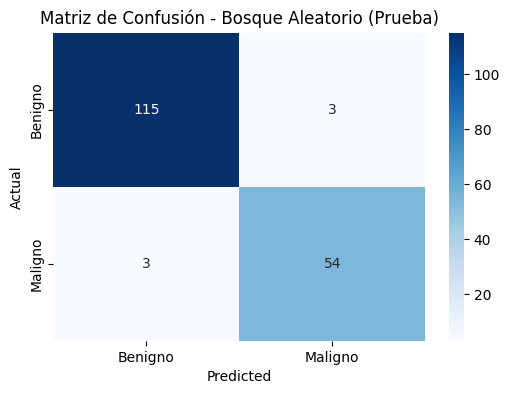

In [67]:
# Evaluar y mostrar métricas de desempeño
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f"Precisión en Entrenamiento: {round(acc_train * 100, 2)}%")
    print(f"Precisión en Prueba: {round(acc_test * 100, 2)}%")

    print("\nReporte de Clasificación (Prueba):\n", classification_report(y_test, y_pred_test))

    # Matriz de confusión para el conjunto de prueba
    cm_test = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de Confusión - Bosque Aleatorio (Prueba)')
    plt.show()

    # Return the desired values
    return y_test, y_pred_test # Added this line to return y_test and y_pred_test

# Llamamos a la funcion de evaluación
y_test_resultado_forest, y_pred_resultado_forest = evaluar_modelo(modelo_bosques_aleatorios, X_train, y_train, X_test, y_test)

In [68]:
report_forest = classification_report(y_test_resultado_forest, y_pred_resultado_forest, output_dict=True)

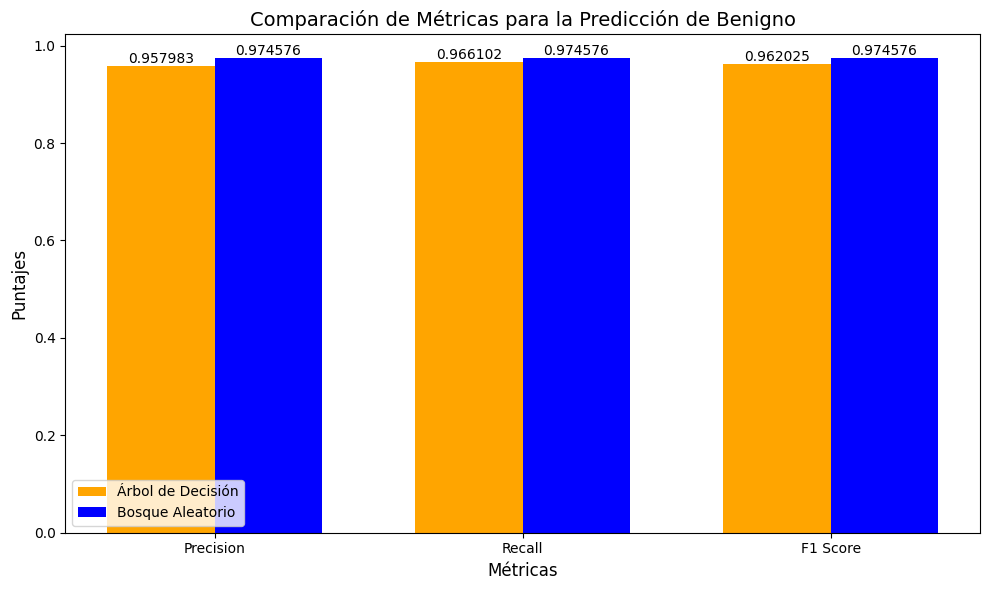

In [69]:
# Extraemos las métricas de 'Benigno' (0) y 'Maligno' (1) para ambos modelos (Árbol de Decisión y Bosque Aleatorio)

# Para el Árbol de Decisión (report_tree)
precision_tree_benigno = report_tree['0']['precision']
recall_tree_benigno = report_tree['0']['recall']
f1_tree_benigno = report_tree['0']['f1-score']

precision_tree_maligno = report_tree['1']['precision']
recall_tree_maligno = report_tree['1']['recall']
f1_tree_maligno = report_tree['1']['f1-score']

# Para el Bosque Aleatorio (report_forest)
precision_forest_benigno = report_forest['0']['precision']
recall_forest_benigno = report_forest['0']['recall']
f1_forest_benigno = report_forest['0']['f1-score']

precision_forest_maligno = report_forest['1']['precision']
recall_forest_maligno = report_forest['1']['recall']
f1_forest_maligno = report_forest['1']['f1-score']

# 1. Comparación de métricas para la predicción de 'Benigno'
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1 Score']
benigno_tree = [precision_tree_benigno, recall_tree_benigno, f1_tree_benigno]
benigno_forest = [precision_forest_benigno, recall_forest_benigno, f1_forest_benigno]

# Bar plot comparativo para Benigno
bar_width = 0.35
index = range(3)
bar1 = ax.bar(index, benigno_tree, bar_width, label='Árbol de Decisión', color='orange')
bar2 = ax.bar([i + bar_width for i in index], benigno_forest, bar_width, label='Bosque Aleatorio', color='blue')

# Añadir etiquetas y título
ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Puntajes', fontsize=12)
ax.set_title('Comparación de Métricas para la Predicción de Benigno', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics)
ax.legend()

# Etiquetar las barras con los valores
for container in [bar1, bar2]:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


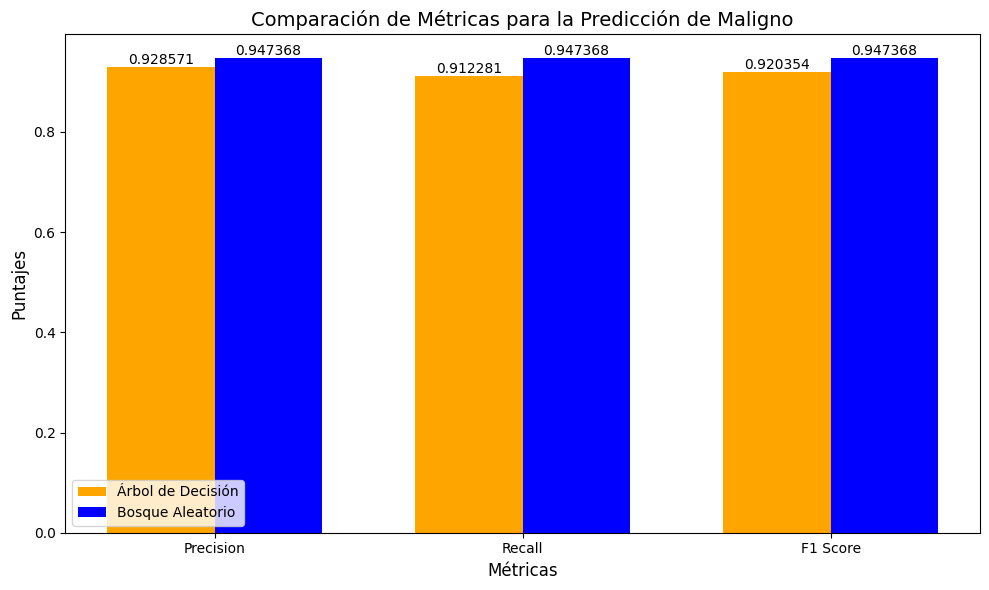

In [71]:
# Asignamos las métricas para la predicción de Maligno de ambos modelos

# Para el Árbol de Decisión (report_tree) - Maligno (1)
precision_tree_maligno = report_tree['1']['precision']
recall_tree_maligno = report_tree['1']['recall']
f1_tree_maligno = report_tree['1']['f1-score']

# Para el Bosque Aleatorio (report_forest) - Maligno (1)
precision_forest_maligno = report_forest['1']['precision']
recall_forest_maligno = report_forest['1']['recall']
f1_forest_maligno = report_forest['1']['f1-score']

# 2. Comparación de métricas para la predicción de 'Maligno'
fig, ax = plt.subplots(figsize=(10, 6))
maligno_tree = [precision_tree_maligno, recall_tree_maligno, f1_tree_maligno]
maligno_forest = [precision_forest_maligno, recall_forest_maligno, f1_forest_maligno]

# Bar plot comparativo para Maligno
bar_width = 0.35
index = range(3)
bar1 = ax.bar(index, maligno_tree, bar_width, label='Árbol de Decisión', color='orange')
bar2 = ax.bar([i + bar_width for i in index], maligno_forest, bar_width, label='Bosque Aleatorio', color='blue')

# Añadir etiquetas y título
ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Puntajes', fontsize=12)
ax.set_title('Comparación de Métricas para la Predicción de Maligno', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics)
ax.legend()

# Etiquetar las barras con los valores
for container in [bar1, bar2]:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# conclusión
Desempeño similar entre modelos: Tanto el Árbol de Decisión como el Bosque Aleatorio muestran métricas similares, con precisión de 0.96 en Benigno y 0.94 en Maligno, lo que indica que ambos modelos son efectivos.

Elección según recursos: Si se busca mayor rapidez y menor complejidad, el Árbol de Decisión es adecuado, ya que tiene un desempeño cercano al Bosque Aleatorio, que requiere más recursos computacionales.

Recomendación: El Bosque Aleatorio es preferible si se busca una ligera mejora en precisión y robustez, especialmente en escenarios más complejos, aunque el Árbol de Decisión es suficiente para aplicaciones simples.